<a href="https://colab.research.google.com/github/misshp11/CV2/blob/main/lab2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import utils
 

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

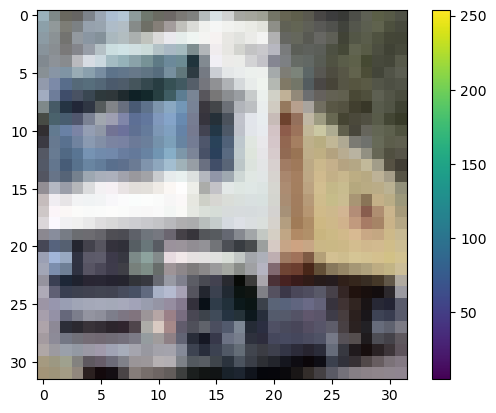

In [5]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [6]:
x_train = x_train/ 255
x_test = x_test/ 255

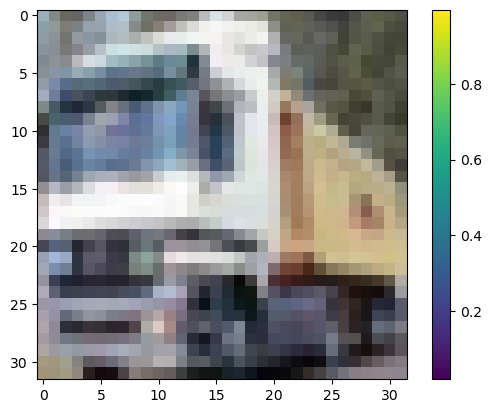

In [7]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [52]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(64, 3, activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(128, 3, activation="relu"),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(20, activation="softmax")
])

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_11 (Flatten)        (None, 2048)            

In [55]:
model.fit(x_train, y_train, epochs =25)

Epoch 1/25
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5315 - accuracy: 0.4432
Epoch 2/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1547 - accuracy: 0.5930
Epoch 3/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9820 - accuracy: 0.6580
Epoch 4/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8617 - accuracy: 0.7015
Epoch 5/25
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7661 - accuracy: 0.7340
Epoch 6/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6892 - accuracy: 0.7600
Epoch 7/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6143 - accuracy: 0.7873
Epoch 8/25
1563/1563 [==============================] - 41s 27ms/step - loss: 0.5555 - accuracy: 0.8055
Epoch 9/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.4883 - accuracy: 0.8303
Epoch 10/25
1563/1563 [==============================] - 42s 27m

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 1.9009 - accuracy: 0.7336
Test loss: 1.9009147882461548
Test accuracy: 0.7336000204086304


In [57]:
predictions = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


array([6], dtype=uint8)

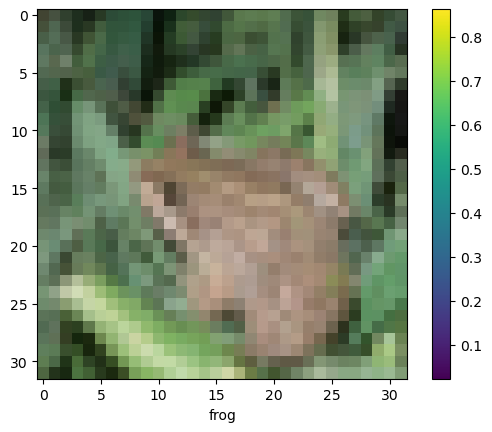

In [73]:
im = 4

predictions[im]

np.argmax(predictions[im])
y_test[im]

plt.figure()
plt.imshow(x_test[im])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[im][0]])

y_test[im]